## 와인 데이터 가져오기

In [26]:
import numpy as np
import pandas as pd
wine=pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


## 데이터 전처리와 분리 

In [3]:
from pandas.core.common import standardize_mapping
data=wine[['alcohol', 'sugar', 'pH']].to_numpy()
target=wine['class'].to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    data, target, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

(5197, 3) (1300, 3)


## 로지스틱 회귀로 이진분류 하기 

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.7794881662497595
0.7761538461538462


## 결정 트리의 장점: 분류 설명에 용이함 

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.996921300750433
0.8592307692307692


## 결정 트리 그림 출력

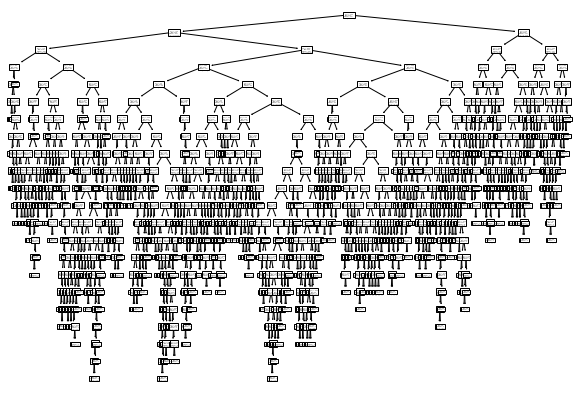

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

## 트리 깊이 제한, 나뉘는 특성 파악하기

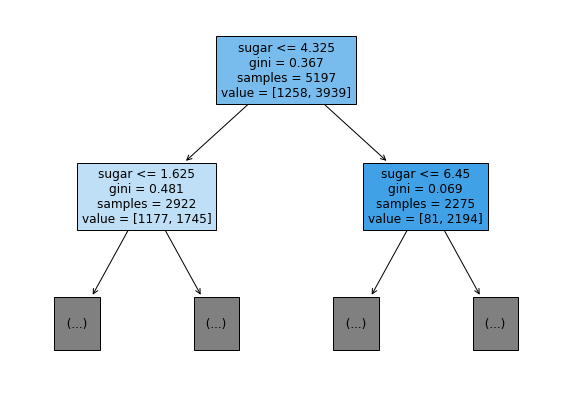

In [19]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 가지치기

In [20]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))


0.8454877814123533
0.8415384615384616


## 결정 트리 그림 출력 

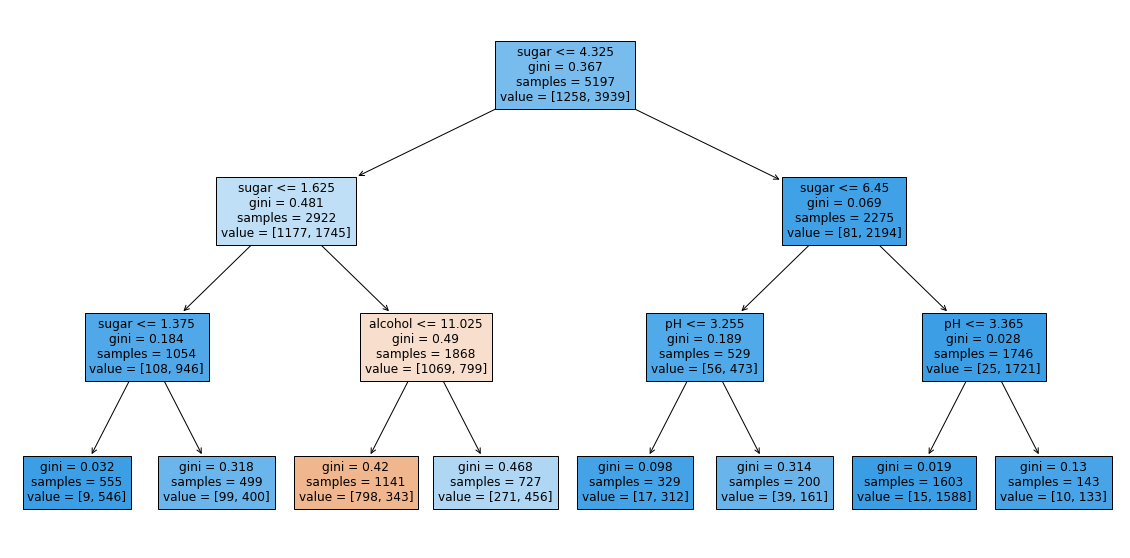

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 결정 중요도 

In [25]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
